In [1]:
import numpy as np
import pandas as pd

# Data

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Goal is to predict `median_house_value`

# Missing Data Handling

`na` = not available

`nan` = not a number

In [4]:
# how many missing data per column
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

1. Ignore the rows
2. Ignore the column
3. Replace with some value (mean, median, mode) [missing value imputation]

In [5]:
housing['total_bedrooms'].median()

435.0

In [6]:
total_bedrooms_median = housing['total_bedrooms'].median()

To replace `<column>.fillna(value)`

In [7]:
housing['total_bedrooms'].isna().sum()

207

In [8]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(total_bedrooms_median)

In [9]:
# how many missing data per column
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Note:** For categorical data, replacing with `mode` may be a good strategy.

In [10]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Types of Data

1. Categorical
    1. Nominal
    2. Ordinal
2. Numerical
    3. Interval
    4. Ratio

# Numerical Data Handling

In [11]:
# seperating numerical columns
housing_num = housing.drop('ocean_proximity', axis=1)

## What is `axis`?

`axis = 0` row wise
`axis = 1` column wise

To delete a row `housing.drop(3, axis=0)`

In [12]:
housing_num.sum(axis=1)

0        454021.9752
1        370188.9414
2        354404.8674
3        343559.2431
4        344902.4462
            ...     
20635     81258.9503
20636     78355.8368
20637     96415.9100
20638     87996.9772
20639     94654.5186
Length: 20640, dtype: float64

## Feature Engineering

Extract new feature from the existing ones.

### Multiple Feature Mixing

Hand-crafted features.

In [13]:
housing_num["rooms_per_household"] = housing_num["total_rooms"] / housing_num["households"]
housing_num["bedrooms_per_room"] = housing_num["total_bedrooms"] / housing_num["total_rooms"]
housing_num["population_per_household"] = housing_num["population"] / housing_num["households"]

In [14]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


### Normalization / Feature Scaling

ML algorithms works best when columns have similar range.

Popular ranges are `[0, 1]` and `[-1, 1]`

In [15]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,2.824675,1243.333333


In [16]:
housing_num.abs().max()

longitude                      124.350000
latitude                        41.950000
housing_median_age              52.000000
total_rooms                  39320.000000
total_bedrooms                6445.000000
population                   35682.000000
households                    6082.000000
median_income                   15.000100
median_house_value          500001.000000
rooms_per_household            141.909091
bedrooms_per_room                2.824675
population_per_household      1243.333333
dtype: float64

In [17]:
housing_num.abs() / housing_num.abs().max()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.982951,0.902980,0.788462,0.022380,0.020016,0.009024,0.020717,0.555010,0.905198,0.049216,0.051897,0.002055
1,0.982871,0.902503,0.403846,0.180544,0.171606,0.067289,0.187110,0.553423,0.716999,0.043959,0.055156,0.001697
2,0.983032,0.902265,1.000000,0.037309,0.029480,0.013901,0.029102,0.483823,0.704199,0.058405,0.045852,0.002254
3,0.983112,0.902265,1.000000,0.032401,0.036462,0.015638,0.036008,0.376204,0.682599,0.040994,0.065303,0.002049
4,0.983112,0.902265,1.000000,0.041378,0.043445,0.015834,0.042585,0.256412,0.684399,0.044267,0.060926,0.001755
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.973784,0.941120,0.480769,0.042345,0.058029,0.023681,0.054258,0.104019,0.156200,0.035554,0.079522,0.002059
20636,0.974749,0.941359,0.346154,0.017726,0.023274,0.009977,0.018744,0.170452,0.154200,0.043084,0.076189,0.002512
20637,0.974829,0.939928,0.326923,0.057325,0.075252,0.028222,0.071194,0.113333,0.184600,0.036682,0.076176,0.001870
20638,0.975633,0.939928,0.346154,0.047304,0.063460,0.020767,0.057382,0.124479,0.169400,0.037556,0.077847,0.001708


## Why (L - min) / (max - min)

In [18]:
L = np.array([-4, -2, -1, 0, 1, 2, 3])

In [19]:
L.max() - L.min()

7

In [20]:
(L - L.min()) / (L.max() - L.min())

array([0.        , 0.28571429, 0.42857143, 0.57142857, 0.71428571,
       0.85714286, 1.        ])

In [21]:
housing_num.max()

longitude                     -114.310000
latitude                        41.950000
housing_median_age              52.000000
total_rooms                  39320.000000
total_bedrooms                6445.000000
population                   35682.000000
households                    6082.000000
median_income                   15.000100
median_house_value          500001.000000
rooms_per_household            141.909091
bedrooms_per_room                2.824675
population_per_household      1243.333333
dtype: float64

In [22]:
housing_num.min()

longitude                    -124.350000
latitude                       32.540000
housing_median_age              1.000000
total_rooms                     2.000000
total_bedrooms                  1.000000
population                      3.000000
households                      1.000000
median_income                   0.499900
median_house_value          14999.000000
rooms_per_household             0.846154
bedrooms_per_room               0.037151
population_per_household        0.692308
dtype: float64

In [23]:
housing_num = (housing_num - housing_num.min()) / (housing_num.max() - housing_num.min())

In [24]:
# housing_num = housing_num / housing_num.max()

In [25]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,0.395579,0.032488,0.063369,0.001914
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,0.237928,0.017539,0.023407,0.008358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.215671,0.025482,0.049533,0.001398
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588,0.031071,0.059554,0.001711
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.514897,0.036907,0.072816,0.002084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.043512,0.039261,0.001499
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.038224,0.042563,0.001141
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.052756,0.033135,0.001698
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.035241,0.052845,0.001493
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.038534,0.048410,0.001198
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.029769,0.067255,0.001503
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.037344,0.063876,0.001956
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.030904,0.063864,0.001314
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.031783,0.065557,0.001152


# Categorical Data Handling

In [27]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**One-hot encoding**

```
o1, o2, o3, o4, o5
1, 0, 0, 0, 0
0, 1, 0, 0, 0
0, 0, 1, 0, 0
0, 0, 0, 1, 0
0, 0, 0, 0, 1
```

How to measure distance in multi-dimension?

$(x_1, y_1, z_1)$ and $(x_2, y_2, z_2)$

$d = \sqrt((x_1 - x_2)^2 + ...)$

In [28]:
housing_cat = pd.get_dummies(housing['ocean_proximity'], dtype=int)

In [29]:
housing_cat

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


# Merge Numerical and Categorical

In [30]:
housing_prepared = pd.concat([housing_num, housing_cat], axis=1)

In [31]:
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.043512,0.039261,0.001499,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.038224,0.042563,0.001141,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.052756,0.033135,0.001698,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.035241,0.052845,0.001493,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.038534,0.048410,0.001198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.029769,0.067255,0.001503,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.037344,0.063876,0.001956,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.030904,0.063864,0.001314,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.031783,0.065557,0.001152,0,1,0,0,0


# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_prepared, test_size=0.2, random_state=42)

In [33]:
train_x = train_set.drop('median_house_value', axis=1)
train_y = train_set['median_house_value']

test_x = test_set.drop('median_house_value', axis=1)
test_y = test_set['median_house_value']

In [34]:
train_y

14196    0.181445
8267     0.756906
17445    0.324949
14265    0.161651
2271     0.168043
           ...   
11284    0.441650
11964    0.170723
5390     0.427011
860      0.553608
15795    0.639175
Name: median_house_value, Length: 16512, dtype: float64

In [35]:
train_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,0.729084,0.018066,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0.029572,0.058627,0.002414,0,0,0,0,1
8267,0.616534,0.130712,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.025715,0.070152,0.000842,0,0,0,0,1
17445,0.385458,0.225292,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0.034025,0.049268,0.001634,0,0,0,0,1
14265,0.721116,0.015940,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0.022378,0.079324,0.002657,0,0,0,0,1
2271,0.453187,0.450584,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0.038439,0.051583,0.001294,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.636454,0.131775,0.666667,0.033776,0.031037,0.018358,0.035520,0.404829,0.037451,0.040888,0.001883,1,0,0,0,0
11964,0.689243,0.157279,0.627451,0.078386,0.088299,0.049048,0.073672,0.175867,0.042693,0.052977,0.002585,0,1,0,0,0
5390,0.594622,0.158342,0.686275,0.053385,0.088144,0.049133,0.086499,0.167894,0.022264,0.083828,0.002124,1,0,0,0,0
860,0.238048,0.535600,0.274510,0.090874,0.092489,0.049721,0.091761,0.359947,0.039338,0.046580,0.002001,1,0,0,0,0


In [36]:
train_x.shape, train_y.shape

((16512, 16), (16512,))

In [37]:
test_x.shape, test_y.shape

((4128, 16), (4128,))

# Learning

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [39]:
model = MLPRegressor()
model.fit(train_x, train_y)

MLPRegressor()

# Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [41]:
test_y_prediction = model.predict(test_x)

In [42]:
test_y_prediction

array([0.0815395 , 0.1661352 , 0.58624958, ..., 0.94525265, 0.13412784,
       0.41131634])

In [43]:
test_x.shape

(4128, 16)

In [44]:
test_y_prediction.shape

(4128,)

mean absolute error:

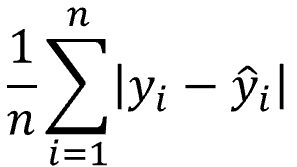

```
truth = [23, 10, 15]
prediction = [20, 13, 14]

absolute_diff = [3, 3, 1]
mean_absolute_diff = (3 + 3 + 1) / 3
```

In [45]:
mean_absolute_error(test_y, test_y_prediction)

0.09132517228882754

mean squared error:

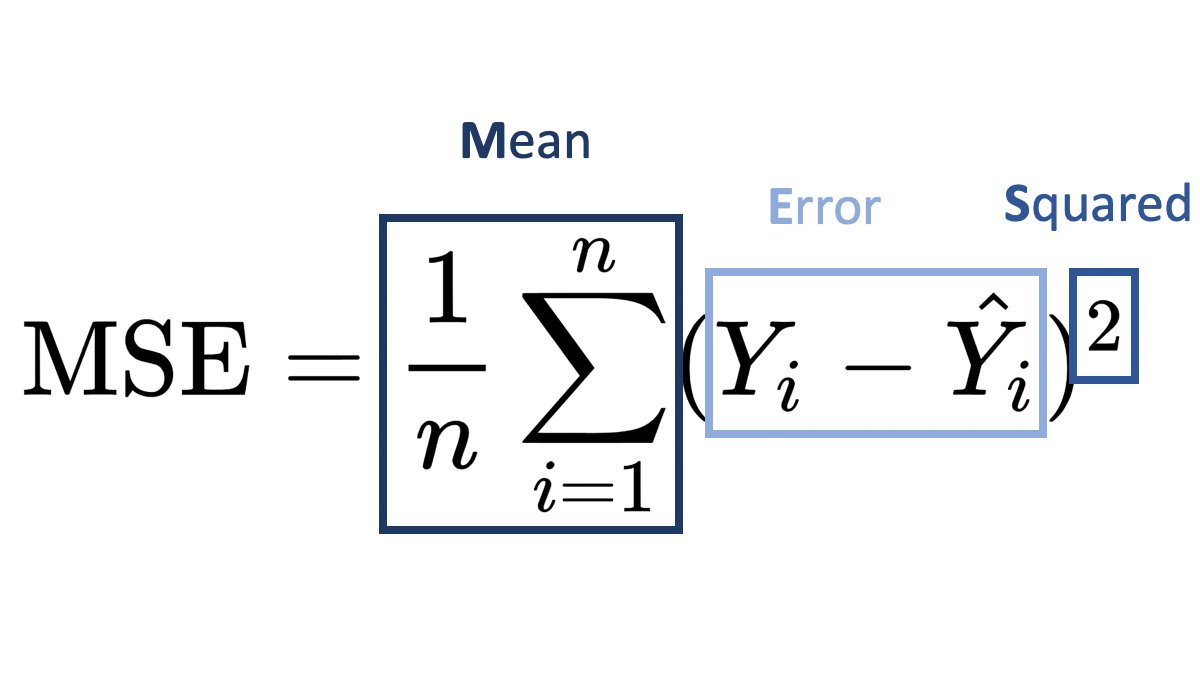

```
truth = [23, 10, 15]
prediction = [20, 13, 14]

absolute_diff = [3, 3, 1]
absolute_diff_sq = [9, 9, 1]
mean_absolute_diff_sq = (9 + 9 + 1) / 3
```

In [46]:
mean_squared_error(test_y, test_y_prediction)

0.01823289435083613

In [47]:
root_mean_squared_error(test_y, test_y_prediction)

0.13502923517089227

Linear Reg: 0.02244945442900468

Decision Tree Reg: 0.021794017667549015

Neural network: 0.01823289435083613